<h1 style='color: Teal'> Assignment 1: Data Parsing, Cleansing and Integration </h1>

<h2 style='color: cyan'> Task 1 and 2 </h2>

#### Student Name: Ayush Kamleshbhai Patel
#### Student ID: s3891013

Date: XXXX

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used:
* pandas
* re
* numpy
* xml
* re
* seaborn
* matplotlib
* difflib
* sklearn

<h1 style = 'color: LimeGreen' > Introduction </h1>

The dataset consolidates job listings along with pertinent details about these roles, collected from multiple job search platforms. Analyzing and pre-processing this data is increasingly vital for job search websites, as it contributes to improving the user search experience. My objective is to identify and address challenges in integrating this data, which consists of a substantial volume of job-related records stored in XML format and potentially suffers from unspecified data quality issues.

## Identify conflict
1. ### Schema level conflicts:
*  Typos and spelling mistakes
*  Irregularities, e.g., abnormal data values and data formats
* Violations of the Integrity constraint.
* Outliers
* Duplications
* Missing values
* Inconsistency, e.g., inhomogeneity in values and types in representing the same data
2. ### Data level conflicts:
* Duplications

<h3 style='color: MediumBlue  '> Importing libraries 

In [1]:
# Code to import libraries as you need in this assessment, e.g.,
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import re
import seaborn as sns
import matplotlib.pyplot as plt
import difflib
from sklearn.preprocessing import LabelEncoder
import networkx as nx
# import sklearn

## Task 1. Parsing Data

### 1.1. Examining and loading data

In [2]:
# Code to inspect the provided data file
tree = ET.parse('s3891013_dataset1.xml')
root = tree.getroot()
# Couple of notes for all code block in this notebook
## please provide proper comment on your code
## Please re-start and run all cells to make sure codes are runable and include your output in the submission

In [3]:
num_sources = len(root.findall('Source'))
num_rows_first_source = len(root.find('Source').findall('Row'))
print(f"Number of Sources: {num_sources}")
print(f"Number of Records in First Source: {num_rows_first_source}")

Number of Sources: 107
Number of Records in First Source: 174


In [4]:
first_record = root.find('Source').find('Row')
for child in first_record:
    print(child.tag, ":", child.text)

Title : PI Underwriter  Regional Markets
Location : London
Company : Idex Consulting LLP
ContractTime : permanent
Category : Accounting & Finance Jobs
Salary : 57500
OpenDate : 20121214T000000
CloseDate : 20130212T000000


## Content and Structure of the XML file:

### Root Element:
The root element of the XML document is `<Instances>`.

### Sources:
Inside the root element, there are child elements named `<Source>`. Each of these elements represents a source of data and has an attribute `Name` which provides the name of the source. The document contains data from 107 different sources.

### Records/Rows:
Within each `<Source>` element, there are multiple `<Row>` elements. These rows represent individual job listings. Each `<Row>` element has an attribute `ID`, which is a unique identifier for that record.

### Data Fields:
Inside each `<Row>`, there are several child elements that provide details about the job listing:

- `<Title>`: Represents the title or position of the job.
- `<Location>`: Denotes where the job is located.
- `<Company>`: The company or organization offering the job.
- `<ContractTime>`: Specifies the type of job contract (e.g., permanent).
- `<Category>`: The category or domain of the job (e.g., Accounting & Finance Jobs).
- `<Salary>`: The offered salary for the job position.
- `<OpenDate>`: The start date for accepting job applications.
- `<CloseDate>`: The last date for accepting job applications.

This structure suggests that the XML file aggregates job listings from various sources. Each source can have multiple job listings, and each job listing provides detailed information about the position.


### 1.2 Parsing data into the required format

<span style="color: red"> You might have complex notebook structure in this section, please feel free to create your own notebook structure. </span>

In [5]:
# Parsing the XML and storing it in a list of dictionaries
data = []

# Iterating through each source and its rows
for source in root.findall('Source'):
    sourceName = source.attrib['Name']
    for row in source.findall('Row'):
        record = {
            'Id': row.attrib['ID'],
            'Title': row.find('Title').text if row.find('Title') is not None else None,
            'Location': row.find('Location').text if row.find('Location') is not None else None,
            'Company': row.find('Company').text if row.find('Company') is not None else None,
            'ContractType': row.find('ContractType').text if row.find('ContractType') is not None else None,
            'ContractTime': row.find('ContractTime').text if row.find('ContractTime') is not None else None,
            'Category': row.find('Category').text if row.find('Category') is not None else None,
            'Salary': row.find('Salary').text if row.find('Salary') is not None else None,
            'OpenDate': row.find('OpenDate').text if row.find('OpenDate') is not None else None,
            'CloseDate': row.find('CloseDate').text if row.find('CloseDate') is not None else None,
            'SourceName': sourceName
        }
        data.append(record)

df = pd.DataFrame(data)
df

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,68241654,PI Underwriter Regional Markets,London,Idex Consulting LLP,None,permanent,Accounting & Finance Jobs,57500,20121214T000000,20130212T000000,insurancejobs.co.uk
1,71138818,COMMERCIAL INSURANCE ACCOUNT HANDLER HERTFORD...,London,Clark James Insurance And Financial Services R...,None,permanent,Accounting & Finance Jobs,26000,20130314T150000,20130612T150000,insurancejobs.co.uk
2,71391843,Claims Handler Motor Trade,Hertfordshire,Lawes Insurance Recruitment,None,permanent,Accounting & Finance Jobs,19000,20131124T120000,20140222T120000,insurancejobs.co.uk
3,70420154,Commercial Jewellers Block Account Handler,Birmingham,Lawes Insurance Recruitment,None,permanent,Accounting & Finance Jobs,22000,20121230T150000,20130129T150000,insurancejobs.co.uk
4,67779524,Protection Indemnity Underwriter,The City,Lawes Insurance Recruitment,None,permanent,Accounting & Finance Jobs,45000,20120904T150000,20121103T150000,insurancejobs.co.uk
...,...,...,...,...,...,...,...,...,...,...,...
50748,70570237,Technology Consultant Financial Services,London,Links Resourcing,None,permanent,IT Jobs,None,20120201T150000,20120501T150000,cardandpaymentjobs.com
50749,72531462,EI/POS net developer,UK,JobG8,None,None,IT Jobs,60000,20130408T120000,20130607T120000,cardandpaymentjobs.com
50750,67142856,Senior Business Analyst Data Mining,UK,Global Payments Network Ltd,None,permanent,IT Jobs,50000,20120130T120000,20120229T120000,cardandpaymentjobs.com
50751,68849008,Corporate Facilities Manager,UK,RDF,None,permanent,IT Jobs,50000 perAnnum,20120618T150000,20120718T150000,cardandpaymentjobs.com


......

## Task 2. Auditing and cleansing the loaded data

### We will first create an error list where we will store all the errors we encountered while cleaning the data.

Creating an Error Recorder
To record an error, the following information is needed:

1. `indexOfdf`: Index of the record/row in the original dataset.
2. `Id`: The ID of the job advertisement that has the data issue. If the data issue involves all job records, simply put "ALL".
3. `ColumnName`: The name of the column where the data issue is located.
4. `Original`: The original value of the cell.
5. `Modified`: The modified value of the cell.
6. `ErrorType`: The type of errors, which can include but are not limited to:
*  Missing Values
*  Violation of Integrity Constraint
*  Outliers
*  Any other errors found
7. `Fixing`: Describe how the problem was fixed.

In [6]:
# create and error recorder (i.e. the error_list)
errorHeads = ['indexOfdf','Id','ColumnName', 'Original', 'Modified', 'ErrorType','Fixing']
error_df = pd.DataFrame(columns=errorHeads)
error_df

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing


## We will audit and clean each column one by one.
#### Hence, we will store it in `error_df` simultaneously

We will create a small function which would update `error_df`

In [7]:
# update error list by attributes
def update_error_list(indexOfdf, Id, ColumnName, Orignal, Modified, ErrorType, Fixing):
    error_item=[indexOfdf, Id, ColumnName, Orignal, Modified, ErrorType,Fixing]
    error_df.loc[len(error_df)]=error_item

# Obtain all indexes of the records in the dataframe:
indices = df.index
indices

RangeIndex(start=0, stop=50753, step=1)

In [8]:
print("Following are the datatypes")
df.info()


Following are the datatypes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50753 entries, 0 to 50752
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            50753 non-null  object
 1   Title         50753 non-null  object
 2   Location      50753 non-null  object
 3   Company       48794 non-null  object
 4   ContractType  30439 non-null  object
 5   ContractTime  44835 non-null  object
 6   Category      50753 non-null  object
 7   Salary        50167 non-null  object
 8   OpenDate      50753 non-null  object
 9   CloseDate     50753 non-null  object
 10  SourceName    50753 non-null  object
dtypes: object(11)
memory usage: 4.3+ MB


<h2 style = 'color: Turquoise'>ID Column</h2>

As we see above, `Id` Column is object type and we need to change it to Integer. 

In [9]:
# Converting ID column to integer
df['Id'] = pd.to_numeric(df['Id'], errors='coerce')
df['Id'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 50753 entries, 0 to 50752
Series name: Id
Non-Null Count  Dtype
--------------  -----
50753 non-null  int64
dtypes: int64(1)
memory usage: 396.6 KB


Since we converted all the entries of `Id` column to Integer from Object, we need to add it to `error_df`

In [10]:
update_error_list('ALL', 'ALL', 'Id', 'ALL', 'ALL', 'Wrong data type', 'Converted data type from object to int')
error_df

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
0,ALL,ALL,Id,ALL,ALL,Wrong data type,Converted data type from object to int


<h2 style = 'color: Turquoise'>Title Column</h2>

In [11]:
df['Title'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 50753 entries, 0 to 50752
Series name: Title
Non-Null Count  Dtype 
--------------  ----- 
50753 non-null  object
dtypes: object(1)
memory usage: 396.6+ KB


We can see from above cell output that data type of `Title` column is object which is we want and there are no NA values. <br>
<h4 style = 'color: lime'> <b>We can say that Title column is error free

<h2 style = 'color: Turquoise'>Location Column</h2>

In [12]:
df['Location'] = df['Location'].str.strip()
df['Location'] = df['Location'].str.lower()
df['Location'].value_counts()

Location
uk                   7719
london               6573
south east london    2665
the city             1144
central london        829
                     ... 
londn                   2
manchaster              2
warringtn               1
oxfords                 1
livepool                1
Name: count, Length: 488, dtype: int64

So, first we convert all the location entries to lower case to eliminate the differences of lower and upper case
Next, we filter the entries which occur less than 5 times in the data. Those might the potential typos. 

In [13]:
locations_counts = df['Location'].value_counts()
locations_to_show = locations_counts[locations_counts < 5].index
filtered_entries = df[df['Location'].isin(locations_to_show)]
print(filtered_entries.shape)
faultyLocationEntries = filtered_entries.index.tolist()
filtered_entries

(15, 11)


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
1059,71594623,Junior Web Developer/net Developer/C,hampshira,Monarch Recruitment Ltd.,,permanent,IT Jobs,30000,20120818T000000,20121116T000000,jobserve.com
3991,72679730,Software Tester | QA Engineer Cambridge,cembridge,Verticality Ltd,-,-,IT Jobs,27500,20130325T150000,20130424T150000,jobsite.co.uk
5885,69687739,Business Analyst ********k Essex,londn,Austin Fraser Limited,-,permanent,IT Jobs,32500,20130908T000000,20131107T000000,jobsite.co.uk
12015,72675257,Senior Business Analyst Market Leader Warrin...,warringtn,Ninesharp,None,permanent,IT Jobs,45000,20130312T120000,20130411T120000,totaljobs.com
12313,68690743,Temporary Marketing and Communications Executive,oxfords,Champion recruitment,None,permanent,"PR, Advertising & Marketing Jobs",26150,20131009T150000,20131108T150000,totaljobs.com
16351,68514429,Front Office Manager ****K Berkshire Hampshire,hampshira,James Webber Recruitment,,,Hospitality & Catering Jobs,27000,20120106T120000,20120120T120000,caterer.com
19633,71804993,Registered General Nurse RGN Nursing Homes M...,manchaster,The A24 Group,None,contract,Healthcare & Nursing Jobs,43334,20130526T150000,20130625T150000,staffnurse.com
25895,69081130,Fire Alarm Engineer x ****,croydan,Networx Recruitment,None,permanent,Engineering Jobs,22500,20131005T150000,20140103T150000,cv-library.co.uk
27349,57079212,Customer Service Advisor Branch Based,leads,The Works Uk Ltd,None,permanent,Accounting & Finance Jobs,13000,20121121T120000,20130120T120000,cv-library.co.uk
37406,71740192,BMS Commissioning Engineer,londn,Technical Resources Ltd,full_time,permanent,IT Jobs,44000,20131001T000000,20131031T000000,planetrecruit.com


faulty(with typos) location we got are <br>
1059      hampshira<br>
3991      cembridge<br>
5885          londn<br>
12015     warringtn<br>
12313       oxfords<br>
16351     hampshira<br>
19633    manchaster<br>
25895       croydan<br>
27349         leads<br>
37406         londn<br>
38179     cembridge<br>
38986    manchaster<br>
45941       croydan<br>
47204      livepool<br>
49093         leads<br>

Now we add the the errors into the `error_df` 

In [14]:
for x in faultyLocationEntries:
    # Get all unique locations except the current one
    possible_matches = set(df['Location']) - {df['Location'][x]}
    # Find the closest match
    close_matches = difflib.get_close_matches(df['Location'][x], possible_matches, n=1, cutoff=0.80)
    if close_matches:  # If a close match is found
        update_error_list(x, df['Id'][x], 'Location', df['Location'][x], close_matches[0], 'Spelling Mistake', 'Replaced by closely matching entries in the same column')
        df.loc[x, 'Location'] = close_matches[0]  # Update the DataFrame with the close match
error_df

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
0,ALL,ALL,Id,ALL,ALL,Wrong data type,Converted data type from object to int
1,1059,71594623,Location,hampshira,hampshire,Spelling Mistake,Replaced by closely matching entries in the sa...
2,3991,72679730,Location,cembridge,cambridge,Spelling Mistake,Replaced by closely matching entries in the sa...
3,5885,69687739,Location,londn,london,Spelling Mistake,Replaced by closely matching entries in the sa...
4,12015,72675257,Location,warringtn,warrington,Spelling Mistake,Replaced by closely matching entries in the sa...
5,12313,68690743,Location,oxfords,oxford,Spelling Mistake,Replaced by closely matching entries in the sa...
6,16351,68514429,Location,hampshira,hampshire,Spelling Mistake,Replaced by closely matching entries in the sa...
7,19633,71804993,Location,manchaster,manchester,Spelling Mistake,Replaced by closely matching entries in the sa...
8,25895,69081130,Location,croydan,croydon,Spelling Mistake,Replaced by closely matching entries in the sa...
9,27349,57079212,Location,leads,leeds,Spelling Mistake,Replaced by closely matching entries in the sa...


Now, since we corrected values, if we check again, there should be no entry which is occuring less than 5 times so we can say that typos are eliminated. 

In [15]:
locations_counts = df['Location'].value_counts()
locations_to_show = locations_counts[locations_counts < 5].index
filtered_entries = df[df['Location'].isin(locations_to_show)]
filtered_entries

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName


<h2 style = 'color: Turquoise'>Company Cloumn</h2>

In [16]:
print('null values', df['Company'].isna().sum())
df['Company'].value_counts()


null values 1959


Company
N/A                            2119
                                808
UKStaffsearch                   451
Randstad                        374
CVbrowser                       305
                               ... 
Next Move IT                      1
Blue Prism Limited                1
Eclipse Technical Services        1
Co operative Systems              1
Global Payments Network Ltd       1
Name: count, Length: 8767, dtype: int64

From the above cell output, we can see that there are 2119 entries with 'N/A' and 808 entries with empty string in the `Company` column. <br>
We will replace them both with `'non-specified'` and add them into the `error_df` 

In [17]:
# Replace NaN values with "Non-specified"
# 1. Clean the Company column
# Replacing "N/A" and NaN values with "non-specified"

for x in df[df['Company'] == 'N/A'].index:
    update_error_list(x, df.loc[x, 'Id'], 'Company', 'N/A', 'non-specified', 'abnormal data values', 'Replacing N/A with non-specified as per requirements')

for x in df[df['Company'].isna() == True].index:
    update_error_list(x, df.loc[x, 'Id'], 'Company', 'null value', 'non-specified', 'abnormal data values', 'Replacing N/A with non-specified as per requirements')

df['Company'] = df['Company'].replace({'N/A': 'non-specified'}).fillna('non-specified')
# Replacing blank entries or entries containing only whitespace with "non-specified"
df['Company'].str.strip()
for x in df[df['Company'] == ' '].index:
    update_error_list(x, df.loc[x, 'Id'], 'Company', 'empty data string(just a white space)', 'non-specified', 'abnormal data values', 'Stripping and replacing with non-specified')
df['Company'] = df['Company'].apply(lambda x: 'non-specified' if x == ' ' else x)

print('Unique values and their count in Company column \n', df['Company'].value_counts())

Unique values and their count in Company column 
 Company
non-specified                  4886
UKStaffsearch                   451
Randstad                        374
CVbrowser                       305
Penguin Recruitment             224
                               ... 
Next Move IT                      1
Blue Prism Limited                1
Eclipse Technical Services        1
Co operative Systems              1
Global Payments Network Ltd       1
Name: count, Length: 8766, dtype: int64


In [18]:
error_df

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
0,ALL,ALL,Id,ALL,ALL,Wrong data type,Converted data type from object to int
1,1059,71594623,Location,hampshira,hampshire,Spelling Mistake,Replaced by closely matching entries in the sa...
2,3991,72679730,Location,cembridge,cambridge,Spelling Mistake,Replaced by closely matching entries in the sa...
3,5885,69687739,Location,londn,london,Spelling Mistake,Replaced by closely matching entries in the sa...
4,12015,72675257,Location,warringtn,warrington,Spelling Mistake,Replaced by closely matching entries in the sa...
...,...,...,...,...,...,...,...
4897,49583,68995792,Company,empty data string(just a white space),non-specified,abnormal data values,Stripping and replacing with non-specified
4898,49584,69526646,Company,empty data string(just a white space),non-specified,abnormal data values,Stripping and replacing with non-specified
4899,49585,68995397,Company,empty data string(just a white space),non-specified,abnormal data values,Stripping and replacing with non-specified
4900,49586,68995347,Company,empty data string(just a white space),non-specified,abnormal data values,Stripping and replacing with non-specified


In [19]:
print('null values after manipulation: ', df['Company'].isna().sum())
df.loc[df['Company'] == 'N/A', 'Company'] = 'Non-specified'
df['Company'].value_counts()

null values after manipulation:  0


Company
non-specified                  4886
UKStaffsearch                   451
Randstad                        374
CVbrowser                       305
Penguin Recruitment             224
                               ... 
Next Move IT                      1
Blue Prism Limited                1
Eclipse Technical Services        1
Co operative Systems              1
Global Payments Network Ltd       1
Name: count, Length: 8766, dtype: int64

<h2 style = 'color: Turquoise'>ContractType Column</h2>

We will check different unique values and null values in the `ContractType` Column

In [20]:
print('null values', df['ContractType'].isna().sum())
df['ContractType'].value_counts()

null values 20314


ContractType
full_time    11249
              7187
N/A           5658
-             4924
part_time     1421
Name: count, dtype: int64

We will first identify the errors and add into `errors_df`. <br>
The errors include empty space, 'N/A' entries, '-' entries and null values. <br>
For empty spaces, we would first use strip() function which will cut down multiple white spaces into single which will make it easy for us to manipulate. 

In [21]:
# Loop through the DataFrame rows where 'ContractType' is null (NaN)
# And update the error list
for x in df[df['ContractType'].isna() == True].index:
    update_error_list(x, df.loc[x, 'Id'], 'ContractType', 'null value', 'non-specified', 'missing value', 'replacing with non-specified')

# Remove leading and trailing whitespaces from all entries in the 'ContractType' column
df['ContractType'] = df['ContractType'].str.strip()

# Loop through the DataFrame rows where 'ContractType' is a single whitespace
# And update the error list using a function named `update_error_list`
for x in df[df['ContractType'] == ''].index:
    update_error_list(x, df.loc[x, 'Id'], 'ContractType', 'empty data string(just a white space)', 'non-specified', 'abnormal data values', 'Stripping and replacing with non-specified')

# Loop through the DataFrame rows where 'ContractType' is 'N/A'
# And update the error list
for x in df[df['ContractType'] == 'N/A'].index:
    update_error_list(x, df.loc[x, 'Id'], 'ContractType', 'N/A', 'non-specified', 'abnormal data values', 'replacing with non-specified')

# Loop through the DataFrame rows where 'ContractType' is '-'
# And update the error list
for x in df[df['ContractType'] == '-'].index:
    update_error_list(x, df.loc[x, 'Id'], 'ContractType', '-', 'non-specified', 'abnormal data values', 'replacing with non-specified')

error_df


,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
0,ALL,ALL,Id,ALL,ALL,Wrong data type,Converted data type from object to int
1,1059,71594623,Location,hampshira,hampshire,Spelling Mistake,Replaced by closely matching entries in the sa...
2,3991,72679730,Location,cembridge,cambridge,Spelling Mistake,Replaced by closely matching entries in the sa...
3,5885,69687739,Location,londn,london,Spelling Mistake,Replaced by closely matching entries in the sa...
4,12015,72675257,Location,warringtn,warrington,Spelling Mistake,Replaced by closely matching entries in the sa...
...,...,...,...,...,...,...,...
42980,50725,68445079,ContractType,-,non-specified,abnormal data values,replacing with non-specified
42981,50726,68241125,ContractType,-,non-specified,abnormal data values,replacing with non-specified
42982,50727,68445078,ContractType,-,non-specified,abnormal data values,replacing with non-specified
42983,50728,70417262,ContractType,-,non-specified,abnormal data values,replacing with non-specified


We will loop through each entry of `ContractType` column and check if the value is 'full_time' or 'part_time'. <br>
If entry is either of them, then continue looping and if not, then we will replce it by 'non-specified'

In [22]:
# Loop through each index in the DataFrame's 'ContractType' column
for i in df['ContractType'].index:
    
    # If the value of 'ContractType' at the current index is either 'full_time' or 'part_time'
    if df.loc[i, 'ContractType'] == 'full_time' or df.loc[i, 'ContractType'] == 'part_time':
        # Skip to the next iteration, nothing needs to be done for 'full_time' and 'part_time'
        continue
    else:
        # For all other cases, set the value to 'non-specified'
        df.loc[i, 'ContractType'] = 'non-specified'

df['ContractType'].value_counts()


ContractType
non-specified    38083
full_time        11249
part_time         1421
Name: count, dtype: int64

Now, We can see from above cell output that the only different types of values are 'full_time', 'part_time' and 'non-specified'. 

<h2 style = 'color: Turquoise'>ContractTime Column</h2>

In [23]:
print('null values in ContractTime column: ', df['ContractTime'].isna().sum())
df['ContractTime'].value_counts()


null values in ContractTime column:  5918


ContractTime
permanent    31024
contract      5628
              4362
N/A           2441
-             1380
Name: count, dtype: int64

In [24]:
# Remove leading and trailing whitespaces from all entries in the 'ContractTime' column
df['ContractTime'] = df['ContractTime'].str.strip()

# Loop through the DataFrame rows where 'ContractTime' is a single whitespace
# And update the error list using a function `update_error_list`
for x in df[df['ContractTime'] == ''].index:
    update_error_list(x, df.loc[x, 'Id'], 'ContractTime', 'empty data string(just a white space)', 'non-specified', 'abnormal data values', 'Stripping and replacing with non-specified')

# Loop through the DataFrame rows where 'ContractTime' is 'N/A'
# And update the error list
for x in df[df['ContractTime'] == 'N/A'].index:
    update_error_list(x, df.loc[x, 'Id'], 'ContractTime', 'N/A', 'non-specified', 'abnormal data values', 'replacing with non-specified')

# Loop through the DataFrame rows where 'ContractTime' is '-'
# And update the error list
for x in df[df['ContractTime'] == '-'].index:
    update_error_list(x, df.loc[x, 'Id'], 'ContractTime', '-', 'non-specified', 'abnormal data values', 'replacing with non-specified')

# Loop through the DataFrame rows where 'ContractTime' is null (NaN)
# And update the error list
for x in df[df['ContractTime'].isna() == True].index:
    update_error_list(x, df.loc[x, 'Id'], 'ContractTime', 'null value', 'non-specified', 'missing value', 'replacing with non-specified')

error_df

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
0,ALL,ALL,Id,ALL,ALL,Wrong data type,Converted data type from object to int
1,1059,71594623,Location,hampshira,hampshire,Spelling Mistake,Replaced by closely matching entries in the sa...
2,3991,72679730,Location,cembridge,cambridge,Spelling Mistake,Replaced by closely matching entries in the sa...
3,5885,69687739,Location,londn,london,Spelling Mistake,Replaced by closely matching entries in the sa...
4,12015,72675257,Location,warringtn,warrington,Spelling Mistake,Replaced by closely matching entries in the sa...
...,...,...,...,...,...,...,...
57081,50448,66586300,ContractTime,null value,non-specified,missing value,replacing with non-specified
57082,50484,72328226,ContractTime,null value,non-specified,missing value,replacing with non-specified
57083,50506,71947521,ContractTime,null value,non-specified,missing value,replacing with non-specified
57084,50564,69693532,ContractTime,null value,non-specified,missing value,replacing with non-specified


We will loop through each entry of `ContractTime` column and check if the value is 'permanent' or 'contract'. <br>
If entry is either of them, then continue looping and if not, then we will replce it by 'non-specified'

In [25]:
valid_contract_times = {'permanent', 'contract'}
df['ContractTime'] = df['ContractTime'].apply(lambda x: x if x in valid_contract_times else 'non-specified')

# Get the indices of rows where the 'ContractTime' column is 'non-specified'
faultyContractTime = df[df['ContractTime'] == 'non-specified'].index.tolist()
df['ContractTime'].value_counts()

ContractTime
permanent        31024
non-specified    14101
contract          5628
Name: count, dtype: int64

Now, We can see from above cell output that the only different types of values are 'permanent', 'contract' and 'non-specified'. 

<h2 style = 'color: Turquoise'>Category Column</h2>

In [26]:
print('null values in Category column: ', df['Category'].isna().sum())
df['Category'].value_counts()

null values in Category column:  0


Category
IT Jobs                             13118
Healthcare & Nursing Jobs            8070
Engineering Jobs                     7523
Accounting & Finance Jobs            6780
Sales Jobs                           4879
Hospitality & Catering Jobs          4400
Teaching Jobs                        3470
PR, Advertising & Marketing Jobs     2513
Name: count, dtype: int64

In [27]:
valid_categories = {
    'IT Jobs', 'Healthcare & Nursing Jobs', 'Engineering Jobs', 'Accounting & Finance Jobs', 
    'Sales Jobs', 'Hospitality & Catering Jobs', 'Teaching Jobs', 'PR, Advertising & Marketing Jobs'
}

df['Category'] = df['Category'].apply(lambda x: x if x in valid_categories else None)

# Get the indices of rows where the 'Category' column is None
faultyCategory = df[df['Category'].isnull()].index.tolist()
df['Category'].value_counts()


Category
IT Jobs                             13118
Healthcare & Nursing Jobs            8070
Engineering Jobs                     7523
Accounting & Finance Jobs            6780
Sales Jobs                           4879
Hospitality & Catering Jobs          4400
Teaching Jobs                        3470
PR, Advertising & Marketing Jobs     2513
Name: count, dtype: int64

We can see from above cell output that in `Category` column there are no null values and all the entries are within the domain of our requirements. <br>
<h4 style = 'color: lime'> <b>We can say that Category column is error free

<h2 style = 'color: Turquoise'>Salary Column</h2>

<h4>Below is the conversion of 'Salary' column. We carried out regex matching to normalise data like 47500/year, 25000 -  30000 or 21500 to 26500.</h4>
<b>Note: We haven't dealt with null values yet</b>

In [28]:
faultySalaryIndices = []
for index, value in df['Salary'].items():
    if value is not None:
        try:
            df.at[index, 'Salary'] = float(value)
        except ValueError:
            faultySalaryIndices.append(index)
    else:
        faultySalaryIndices.append(index)
# df[df['Salary'].dtype]
(faultySalaryIndices)
for i in faultySalaryIndices:
    print(i, ':', df['Salary'][i])
print('len: ', len(faultySalaryIndices))

104 : 21500 to 26500
168 : 25000 -  30000
175 :  
196 : 47500/year
223 :  
226 : 32500 to 37500
238 :  
239 :  
249 :  
266 : 40000 to 45000
278 :  
307 : 30000/year
320 :  
322 :  
349 : 35000 to 40000
365 :  
380 :  
420 :  
437 :  
470 :  
491 :  
534 :  
539 :  
575 :  
582 :  
605 : 40000 -  45000
606 :  
618 :  
639 :  
651 :  
663 :  
676 :  
679 :  
684 :  
704 : 42500/year
754 : 30k
759 :  
764 :  
838 :  
842 :  
866 :  
871 :  
878 :  
881 :  
887 :  
894 :  
897 : 45000 perAnnum
908 :  
926 :  
929 :  
936 :  
962 :  
982 : 45000 to 50000
986 :  
987 : 46k
991 :  
1018 :  
1064 : 52500 perAnnum
1067 :  
1099 :  
1103 :  
1104 :  
1105 : 36k
1126 :  
1131 :  
1146 :  
1162 :  
1216 :  
1217 :  
1218 : 29750 to 34750
1248 : 40000/year
1267 :  
1269 :  
1285 :  
1357 :  
1370 :  
1378 :  
1383 :  
1391 :  
1392 :  
1393 :  
1442 :  
1452 :  
1454 : 42500 to 47500
1487 :  
1503 :  
1528 :  
1535 :  
1542 :  
1547 :  
1549 : 40k
1580 :  
1592 :  
1595 :  
1618 : 27500 to 32500
1

In [29]:
# List to keep track of indices where Salary has abnormal formats
outOfFormatIndicesSalary = []

# Function to normalize salary strings
def normalised(sal_string, index):
    
    # Case 1: Match annual salary strings in the format "num-num", e.g., "50000-60000"
    result = re.fullmatch(r'(\d+\.?\d*)\s*(-|to|~)\s*(\d+\.?\d*)', sal_string)
    if result:
        outOfFormatIndicesSalary.append(index)
        # Calculate the average of the range and round to 2 decimal places
        x = (float(result.group(1)) + float(result.group(3))) / 2
        update_error_list(index, df.loc[index, 'Id'], 'Salary', sal_string, np.round(float(x), 2), 'abnormal data format', 'taking mid value of given range')
        return np.round(float(x), 2)
    
    # Case 2: Match annual salary strings with other common notations, e.g., "50000 per year"
    result = re.fullmatch(r'(\d+\.?\d*)(?: per [aA]num| pa|[/\\][yY]ear| perAnnum)', sal_string)
    if result:
        outOfFormatIndicesSalary.append(index)
        update_error_list(index, df.loc[index, 'Id'], 'Salary', sal_string, np.round(float(result.group(1)), 2), 'abnormal data format', "removing 'per year or anum' and obtaining a numerical value")
        return np.round(float(result.group(1)), 2)
    
    # Case 3: Match salaries written in 'k' format, e.g., "50k"
    result = re.fullmatch(r'(\d+)k', sal_string)
    if result:
        outOfFormatIndicesSalary.append(index)
        # Convert 'k' to numerical format by multiplying by 1000
        x = float(result.group(1)) * 1000
        update_error_list(index, df.loc[index, 'Id'], 'Salary', sal_string, np.round(float(x), 2), 'abnormal data format', "converting salary in k format to valid numerical entry")
        return np.round(float(x), 2)
    
    # Case 4: Match hourly wages and convert to annual salary, e.g., "25 per hour"
    result = re.fullmatch(r'(\d+\.\d*)\s*(per hour|p/h)', sal_string)
    if result:
        outOfFormatIndicesSalary.append(index)
        # Convert hourly wage to annual salary assuming 8 working hours per day, 5 days a week, 52 weeks a year
        x = float(result.group(1)) * 8 * 5 * 52
        update_error_list(index, df.loc[index, 'Id'], 'Salary', sal_string, float(result.group(1)) * 8 * 5 * 52, 'abnormal data format', "converting hourly wage to annual salary")
        return np.round(float(x), 2)


Now, we run the above function which fill fix the data format issues and log the errors in `errors_df` as well.

In [30]:

# Applying the modified function to the DataFrame
for idx, value in enumerate(df['Salary']):
    if isinstance(value, str):
        df.at[idx, 'Salary'] = normalised(value, idx)
len(outOfFormatIndicesSalary) #len = 460
error_df

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
0,ALL,ALL,Id,ALL,ALL,Wrong data type,Converted data type from object to int
1,1059,71594623,Location,hampshira,hampshire,Spelling Mistake,Replaced by closely matching entries in the sa...
2,3991,72679730,Location,cembridge,cambridge,Spelling Mistake,Replaced by closely matching entries in the sa...
3,5885,69687739,Location,londn,london,Spelling Mistake,Replaced by closely matching entries in the sa...
4,12015,72675257,Location,warringtn,warrington,Spelling Mistake,Replaced by closely matching entries in the sa...
...,...,...,...,...,...,...,...
57541,50244,66888948,Salary,42500/year,42500.0,abnormal data format,removing 'per year or anum' and obtaining a nu...
57542,50293,70839982,Salary,32500/year,32500.0,abnormal data format,removing 'per year or anum' and obtaining a nu...
57543,50630,69101353,Salary,40500 - 45500,43000.0,abnormal data format,taking mid value of given range
57544,50650,70222725,Salary,39360/year,39360.0,abnormal data format,removing 'per year or anum' and obtaining a nu...


<h4>The following are the null values stored in a list in Salary column. </h4>

In [31]:
df[df['Salary'].isna() == True]

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
175,68496691,Bilingual Desktop support/Floorwalker French ...,london,IDPP,non-specified,contract,IT Jobs,None,20131231T150000,20140301T150000,jobserve.com
223,68628390,Technical Author/Technical Writer,london,Talent Crew Ltd,non-specified,permanent,IT Jobs,None,20120331T120000,20120430T120000,jobserve.com
238,70622553,Service Transition Manager/Service Integration...,dunstable,iSource IT,non-specified,permanent,IT Jobs,None,20120504T150000,20120802T150000,jobserve.com
239,68495506,3rd Line Novell/Microsoft/Active Directory,buckinghamshire,Huntress Group Technology Perms,non-specified,contract,IT Jobs,None,20120227T000000,20120328T000000,jobserve.com
249,68628394,"Senior Change Manager, Transformation Consulta...",west london,Salt,non-specified,permanent,IT Jobs,None,20120815T150000,20121014T150000,jobserve.com
...,...,...,...,...,...,...,...,...,...,...,...
50486,72328137,Camp Director / Assistant Camp Director,london,Camp Beaumont Day Camps,non-specified,contract,IT Jobs,None,20130903T150000,20131102T150000,emptylemon.co.uk
50579,72393485,HIGH VOLTAGE CONTROL PROTECTION DESIGN ENGINEER,aberdeenshire,Jarvis King Associates Ltd,non-specified,permanent,Engineering Jobs,None,20130628T000000,20130728T000000,ncejobs.co.uk
50594,72624839,ENGINEERING GEOLOGIST/GEOTECHNICAL ENGINEER – ...,castleford,Confidential Company,non-specified,permanent,Engineering Jobs,None,20121106T150000,20121206T150000,ncejobs.co.uk
50728,70417262,"CoVenture Graduate Scheme Asset Management, H...",uk,Co Venture,non-specified,non-specified,Sales Jobs,None,20130301T000000,20130315T000000,wikijob.co.uk


In [32]:
nullValuesSalaryIndices = [index for index, value in enumerate(df['Salary']) if value is None]
salary_null_before_manipulation = {}

# Populate the dictionary
for x in df[df['Salary'].isna() == True].index:
    salary_null_before_manipulation[x] = df.loc[x, 'Salary']


In [33]:
len(salary_null_before_manipulation)

1632

<h3>Now we will move forward with predicting missing salary entries</h3> 
First we will do corelation analysis for feature selection

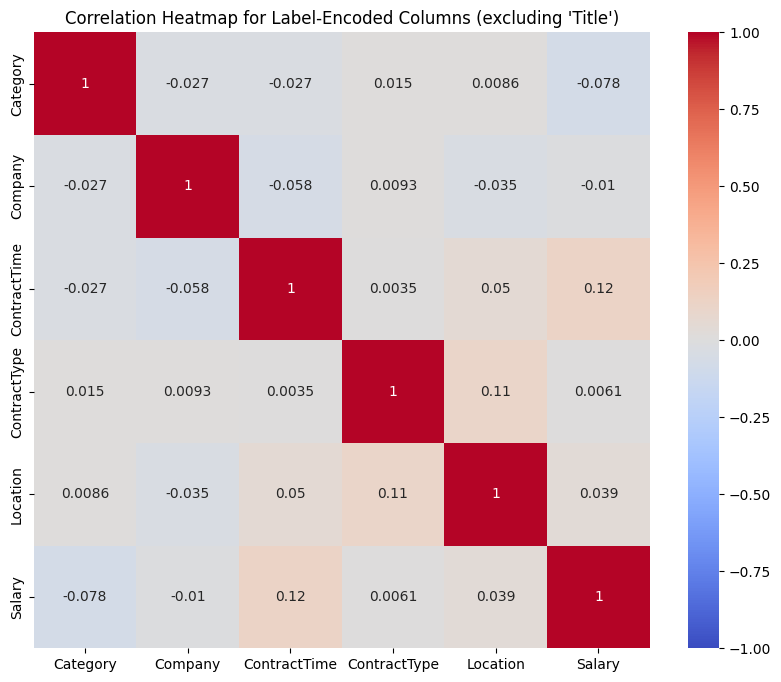

In [34]:
# Compute the correlation with the Salary column
# Specify columns to consider, excluding 'Title', 'Id', 'OpenDate', 'CloseDate', 'SourceName', and 'Unnamed: 0'
ColumnsToConsider = df.columns.difference(['Title', 'Id', 'OpenDate', 'CloseDate', 'SourceName', 'Unnamed: 0'])

# Apply label encoding to the specified columns
new_df = df.copy()
for column in ColumnsToConsider:
    if new_df[column].dtype == 'object':
        le = LabelEncoder()
        new_df[column] = le.fit_transform(new_df[column])

# Compute the correlation matrix
correlation_matrix_without_title = new_df[ColumnsToConsider].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_without_title, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap for Label-Encoded Columns (excluding 'Title')")
plt.show()

<b>Why Group-Based Imputation Using Category is Suitable for This Dataset:</b><br>
<ol>
<li><b>Nature of Salary Determination:</b> In the real world, salaries often vary based on job categories. For instance, positions in IT or finance might generally command higher salaries compared to roles in hospitality or retail. By grouping on Category, we're leveraging this natural structure in the job market.</li>

<li><b>Homogeneity Within Groups:</b> While the overall dataset might show weak correlations, within specific job categories, salaries might be more consistent or homogeneous. By imputing based on category medians, we're drawing from a more specific and relevant subset of the data.</li>

<li><b>Preserves Data Distribution:</b> Unlike replacing all zero salaries with a global median or mean, group-based imputation maintains the original distribution of salaries within each category. This helps in preserving the inherent patterns and variances in the dataset.</li>

<li><b>Robustness to Outliers:</b> Median, as a measure of central tendency, is more robust to outliers than the mean. So, if a particular job category has a few exceptionally high or low salaries, using the median will ensure that the imputed values are not skewed by these outliers.</li>

<li><b>Categorical Nature of the Dataset:</b> Given that most of the dataset's features are categorical, techniques that rely on correlations or linear relationships (like regression imputation) might not be as effective. Group-based imputation capitalizes on the categorical nature of the data, making it more suitable for this dataset.</li>

Considering these reasons, imputing zero salaries based on the median salary of their respective Category is a logical and effective approach for this dataset.
</ol>

In [35]:
for i in nullValuesSalaryIndices:
    df.loc[i, 'Salary'] = 0
    
category_medians = df.groupby('Category')['Salary'].median()

# Replace 0 salaries with the median salary of the respective category
df['Salary'] = df.apply(
    lambda row: category_medians[row['Category']] if row['Salary'] == 0 else row['Salary'],
    axis=1
)
# Check the number of 0 values in the Salary column after imputation
num_zero_salaries_after = (df['Salary'] == 0).sum()
salary_null_after_manipulation = {}

# Populate the dictionary using the indices in the list
for index in nullValuesSalaryIndices:
    salary_null_after_manipulation[index] = df.loc[index, 'Salary']
    
for x in nullValuesSalaryIndices:
    update_error_list(x, df.loc[x, 'Id'], 'Salary', salary_null_before_manipulation[x], salary_null_after_manipulation[x], 'null values', 'Replaced by median value of that particular category which the job belongs to')
    
# num_zero_salaries_after
error_df

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
0,ALL,ALL,Id,ALL,ALL,Wrong data type,Converted data type from object to int
1,1059,71594623,Location,hampshira,hampshire,Spelling Mistake,Replaced by closely matching entries in the sa...
2,3991,72679730,Location,cembridge,cambridge,Spelling Mistake,Replaced by closely matching entries in the sa...
3,5885,69687739,Location,londn,london,Spelling Mistake,Replaced by closely matching entries in the sa...
4,12015,72675257,Location,warringtn,warrington,Spelling Mistake,Replaced by closely matching entries in the sa...
...,...,...,...,...,...,...,...
59173,50486,72328137,Salary,None,40000.0,null values,Replaced by median value of that particular ca...
59174,50579,72393485,Salary,None,31680.0,null values,Replaced by median value of that particular ca...
59175,50594,72624839,Salary,None,31680.0,null values,Replaced by median value of that particular ca...
59176,50728,70417262,Salary,None,25500.0,null values,Replaced by median value of that particular ca...


<h3>Detecting and fixing Outliers in Salary Column</h3>

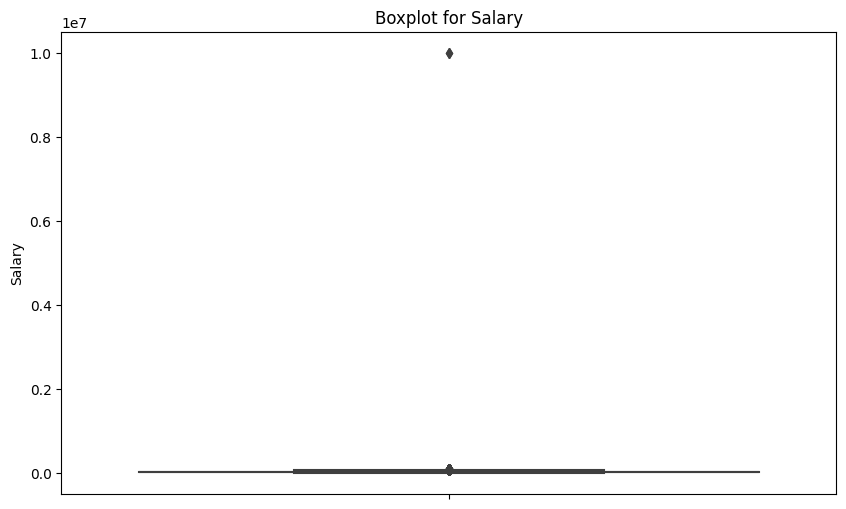

In [36]:
# Plotting a boxplot for the "Salary" column to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Salary'])
plt.title("Boxplot for Salary")
plt.ylabel("Salary")
plt.show()


In [37]:
print('min: ', min(df['Salary']))
print('max: ', max(df['Salary']))
df[df['Salary'] == 10000000.0]

min:  5000.0
max:  10000000.0


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
25283,69930748,Fully qualified Nursery Nurse,surrey,HORIZON TEACHERS,full_time,contract,Teaching Jobs,10000000.0,20120920T150000,20121119T150000,jobs.guardian.co.uk
45069,67774643,Software Support Analyst (Graduate),belfast,MCS Group,full_time,permanent,IT Jobs,10000000.0,20130410T120000,20130709T120000,nijobfinder.co.uk


From the above cell output we see that high is too high which is 10000000.0 usd an year and is definitely unrealistic. These are outliers and needs to be fixed. 

In [38]:
df_copy = df.copy
df_copy = df[df['Salary'] < 10000000.0]
# Let us print the maximum slary after removing the entries with unrealistically high salary.
print('max: ', max(df_copy['Salary']))

max:  106782.0


From the above output we see that after we eliminate the unrealistic entries, maximum is moderate and considerable.
Now, we will replace the outlier entries with 0 and replace it with median values based on category which we did above as well. 

In [39]:
outliersSalary = []
outliersSalary = df[df['Salary'] == 10000000.0].index
for i in outliersSalary:
    # df['Salary'][i] = 0
    df.loc[i, 'Salary'] = 0

In [40]:
category_medians = df.groupby('Category')['Salary'].median()

# Replace 0 salaries with the median salary of the respective category
df['Salary'] = df.apply(
    lambda row: category_medians[row['Category']] if row['Salary'] == 0 else row['Salary'],
    axis=1
)
df.iloc[outliersSalary]

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
25283,69930748,Fully qualified Nursery Nurse,surrey,HORIZON TEACHERS,full_time,contract,Teaching Jobs,26064.0,20120920T150000,20121119T150000,jobs.guardian.co.uk
45069,67774643,Software Support Analyst (Graduate),belfast,MCS Group,full_time,permanent,IT Jobs,40000.0,20130410T120000,20130709T120000,nijobfinder.co.uk


In [41]:
update_error_list(25283, 69930748, 'Salary', 10000000.0, 26064.0, 'Outlier', 'Replaced by median value of that particular category which the job belongs to')
update_error_list(45069, 67774643, 'Salary', 10000000.0, 40000.0, 'Outlier', 'Replaced by median value of that particular category which the job belongs to')

Now we have a look at the boxplot again

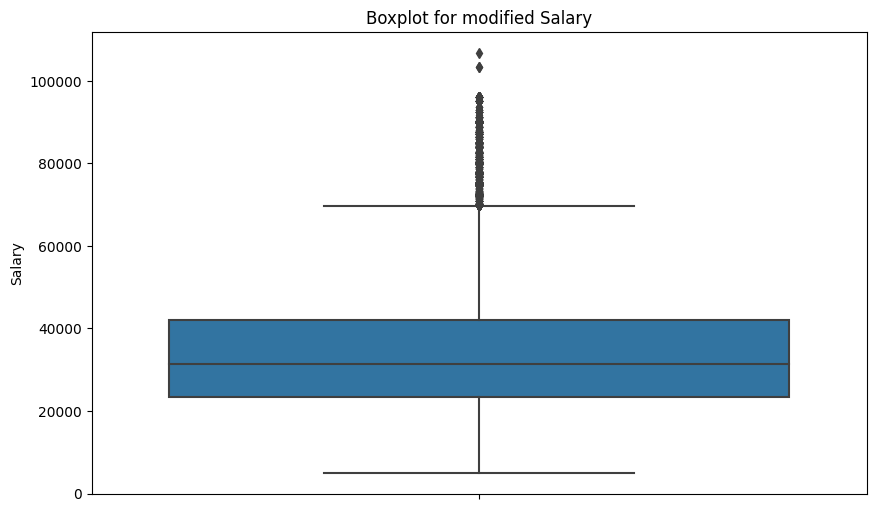

In [42]:
# Plotting a boxplot for the "Salary" column to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Salary'])
plt.title("Boxplot for modified Salary")
plt.ylabel("Salary")
plt.show()

<h2 style = 'color: Turquoise'>OpenDate Column

In [43]:
import datetime as dt
# define a method to parse date using datetime library
def parseDate(datetime):
    try:
        mydt = dt.datetime.strptime(datetime, '%Y%m%dT%H%M%S')
        return True
    except ValueError: # refer to the above, it raises a ValueError
        print(datetime,"is not a valid date")
        return False
df_copy = df.copy()
df_copy['OpenDate_check'] = df_copy['OpenDate'].apply(parseDate)
df_copy[df_copy['OpenDate_check']==False]

20122603T150000 is not a valid date


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName,OpenDate_check
1130,69975652,"Technical Consultant, MQ, WebSphere, London",london,Concilio ltd,non-specified,permanent,IT Jobs,47500.0,20122603T150000,20120525T150000,jobserve.com,False


#### Fixing the above error and adding into `error_df`

In [44]:
update_error_list('14577', '71198154', 'OpenDate', '20132309T000000', '20130923T000000', 'Wrong Date Format', 'Change the location of day and month')

replace_dict = {'20122603T150000':'20120326T150000'}
df['OpenDate'].replace(replace_dict,inplace=True)
error_df

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
0,ALL,ALL,Id,ALL,ALL,Wrong data type,Converted data type from object to int
1,1059,71594623,Location,hampshira,hampshire,Spelling Mistake,Replaced by closely matching entries in the sa...
2,3991,72679730,Location,cembridge,cambridge,Spelling Mistake,Replaced by closely matching entries in the sa...
3,5885,69687739,Location,londn,london,Spelling Mistake,Replaced by closely matching entries in the sa...
4,12015,72675257,Location,warringtn,warrington,Spelling Mistake,Replaced by closely matching entries in the sa...
...,...,...,...,...,...,...,...
59176,50728,70417262,Salary,None,25500.0,null values,Replaced by median value of that particular ca...
59177,50748,70570237,Salary,None,40000.0,null values,Replaced by median value of that particular ca...
59178,25283,69930748,Salary,10000000.0,26064.0,Outlier,Replaced by median value of that particular ca...
59179,45069,67774643,Salary,10000000.0,40000.0,Outlier,Replaced by median value of that particular ca...


<h2 style = 'color: Turquoise'>CloseDate Column

In [45]:
def parseDate(datetime):
    try:
        mydt = dt.datetime.strptime(datetime, '%Y%m%dT%H%M%S')
        return True
    except ValueError: # refer to the above, it raises a ValueError
        print(datetime,"is not a valid date")
        return False
df_copy = df.copy()
df_copy['CloseDate_check'] = df_copy['CloseDate'].apply(parseDate)
df_copy[df_copy['CloseDate_check']==False]

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName,CloseDate_check


In [46]:
print('OpenDate datatype before manipulation: ', df['OpenDate'].dtype)
print('CloseDate datatype before manipulation: ', df['CloseDate'].dtype)
df['OpenDate'] = pd.to_datetime(df['OpenDate'])
df['CloseDate'] = pd.to_datetime(df['CloseDate'])
print('OpenDate datatype after manipulation: ', df['OpenDate'].dtype)
print('CloseDate datatype after manipulation: ', df['CloseDate'].dtype)

OpenDate datatype before manipulation:  object
CloseDate datatype before manipulation:  object
OpenDate datatype after manipulation:  datetime64[ns]
CloseDate datatype after manipulation:  datetime64[ns]


As we can see from above output, we have object datatype before manipulation but datetime64 after manipulation. <br>
Thus, we converted them and we need to add it to `error_df`

In [47]:
update_error_list('ALL', 'ALL', 'OpenDate', 'ALL', 'ALL', 'Wrong Date Type', 'Chnaged the data type from object to datetime')
update_error_list('ALL', 'ALL', 'CloseDate', 'ALL', 'ALL', 'Wrong Date Type', 'Chnaged the data type from object to datetime')
error_df

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
0,ALL,ALL,Id,ALL,ALL,Wrong data type,Converted data type from object to int
1,1059,71594623,Location,hampshira,hampshire,Spelling Mistake,Replaced by closely matching entries in the sa...
2,3991,72679730,Location,cembridge,cambridge,Spelling Mistake,Replaced by closely matching entries in the sa...
3,5885,69687739,Location,londn,london,Spelling Mistake,Replaced by closely matching entries in the sa...
4,12015,72675257,Location,warringtn,warrington,Spelling Mistake,Replaced by closely matching entries in the sa...
...,...,...,...,...,...,...,...
59178,25283,69930748,Salary,10000000.0,26064.0,Outlier,Replaced by median value of that particular ca...
59179,45069,67774643,Salary,10000000.0,40000.0,Outlier,Replaced by median value of that particular ca...
59180,14577,71198154,OpenDate,20132309T000000,20130923T000000,Wrong Date Format,Change the location of day and month
59181,ALL,ALL,OpenDate,ALL,ALL,Wrong Date Type,Chnaged the data type from object to datetime


<h2 style = 'color: Turquoise'>SourceName Column</h2>

In [48]:
df['SourceName'] = df['SourceName'].str.strip()
df[df['SourceName'].isna() == True]

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName


In [49]:
# Stripping spaces from the 'source' column
df['SourceName'] = df['SourceName'].str.strip()
df['SourceName'] = df['SourceName'].fillna('non-specified')

# Identifying the indexes of non-specified entries again after filling NaN values
faultySourceName = df[df['SourceName'] == 'non-specified'].index.tolist()
faultySourceName

[]

## Saving data
Save the parsed and cleaned data as well as the error list, named as:
- \<student\_id\>_dataset1_solution.csv
- \<student\_id\>_errorlist.csv

In [50]:
# code to save output data
df.to_csv('s3891013_dataset1_solution.csv', index=False)

## Summary
Give a short summary and anything you would like to talk about the assessment here.